# 查看进程

In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import corner

In [2]:
outdir = '../chains_singlepsr_wn_B1937+21'
chain = np.loadtxt(os.path.join(outdir, 'chain_1.txt'))
burn = int(0.05 * chain.shape[0])
print(chain.shape[0])
print(burn)

106700
5335


In [3]:
param_names = ['B1937+21_L-wide_ASP_efac',
 'B1937+21_L-wide_ASP_log10_ecorr',
 'B1937+21_L-wide_ASP_log10_t2equad',
 'B1937+21_L-wide_PUPPI_efac',
 'B1937+21_L-wide_PUPPI_log10_ecorr',
 'B1937+21_L-wide_PUPPI_log10_t2equad',
 'B1937+21_Rcvr1_2_GASP_efac',
 'B1937+21_Rcvr1_2_GASP_log10_ecorr',
 'B1937+21_Rcvr1_2_GASP_log10_t2equad',
 'B1937+21_Rcvr1_2_GUPPI_efac',
 'B1937+21_Rcvr1_2_GUPPI_log10_ecorr',
 'B1937+21_Rcvr1_2_GUPPI_log10_t2equad',
 'B1937+21_Rcvr_800_GASP_efac',
 'B1937+21_Rcvr_800_GASP_log10_ecorr',
 'B1937+21_Rcvr_800_GASP_log10_t2equad',
 'B1937+21_Rcvr_800_GUPPI_efac',
 'B1937+21_Rcvr_800_GUPPI_log10_ecorr',
 'B1937+21_Rcvr_800_GUPPI_log10_t2equad',
 'B1937+21_S-wide_ASP_efac',
 'B1937+21_S-wide_ASP_log10_ecorr',
 'B1937+21_S-wide_ASP_log10_t2equad',
 'B1937+21_S-wide_PUPPI_efac',
 'B1937+21_S-wide_PUPPI_log10_ecorr',
 'B1937+21_S-wide_PUPPI_log10_t2equad',
 'RedNoise_P',
 'RedNoise_a1',
 'RedNoise_a2',
 'RedNoise_k',
 'RedNoise_t0']

In [4]:
ind_P = list(param_names).index('RedNoise_P')
ind_a1 = list(param_names).index('RedNoise_a1')
ind_a2 = list(param_names).index('RedNoise_a2')
ind_k = list(param_names).index('RedNoise_k')
ind_t0 = list(param_names).index('RedNoise_t0')
print(ind_P)
print(ind_a1)

24
25


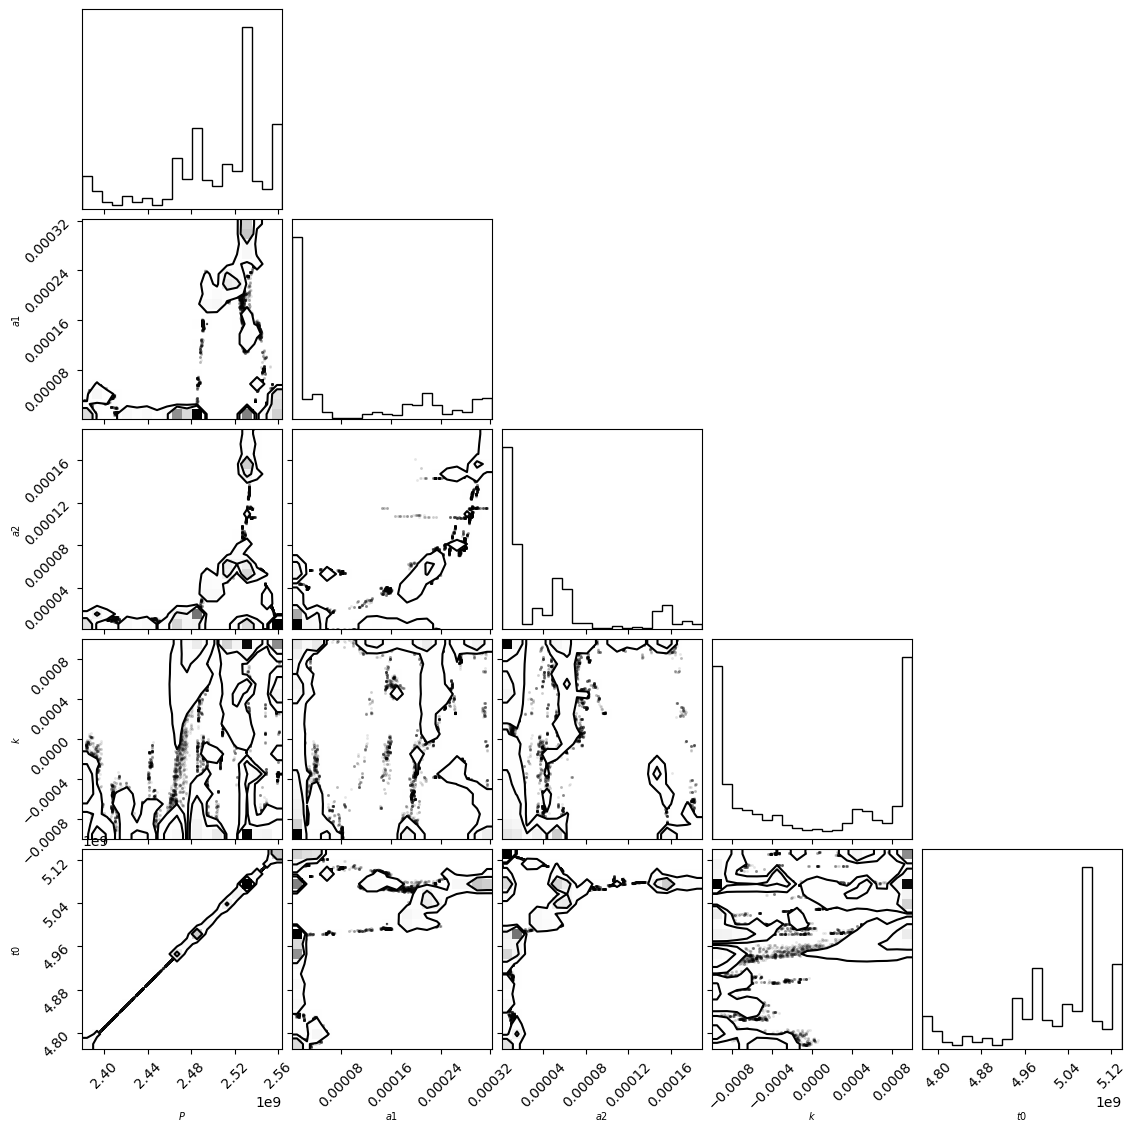

In [5]:
# Make 2d histogram plot for red noise of precession model
fig = corner.corner(chain[burn:, [ind_P, ind_a1, ind_a2, ind_k, ind_t0]],
                   labels=['$P$', '$a1$', '$a2$', '$k$', '$t0$'],
                   label_kwargs={"fontsize": 7},
                   levels=[0.68,0.95]);

6


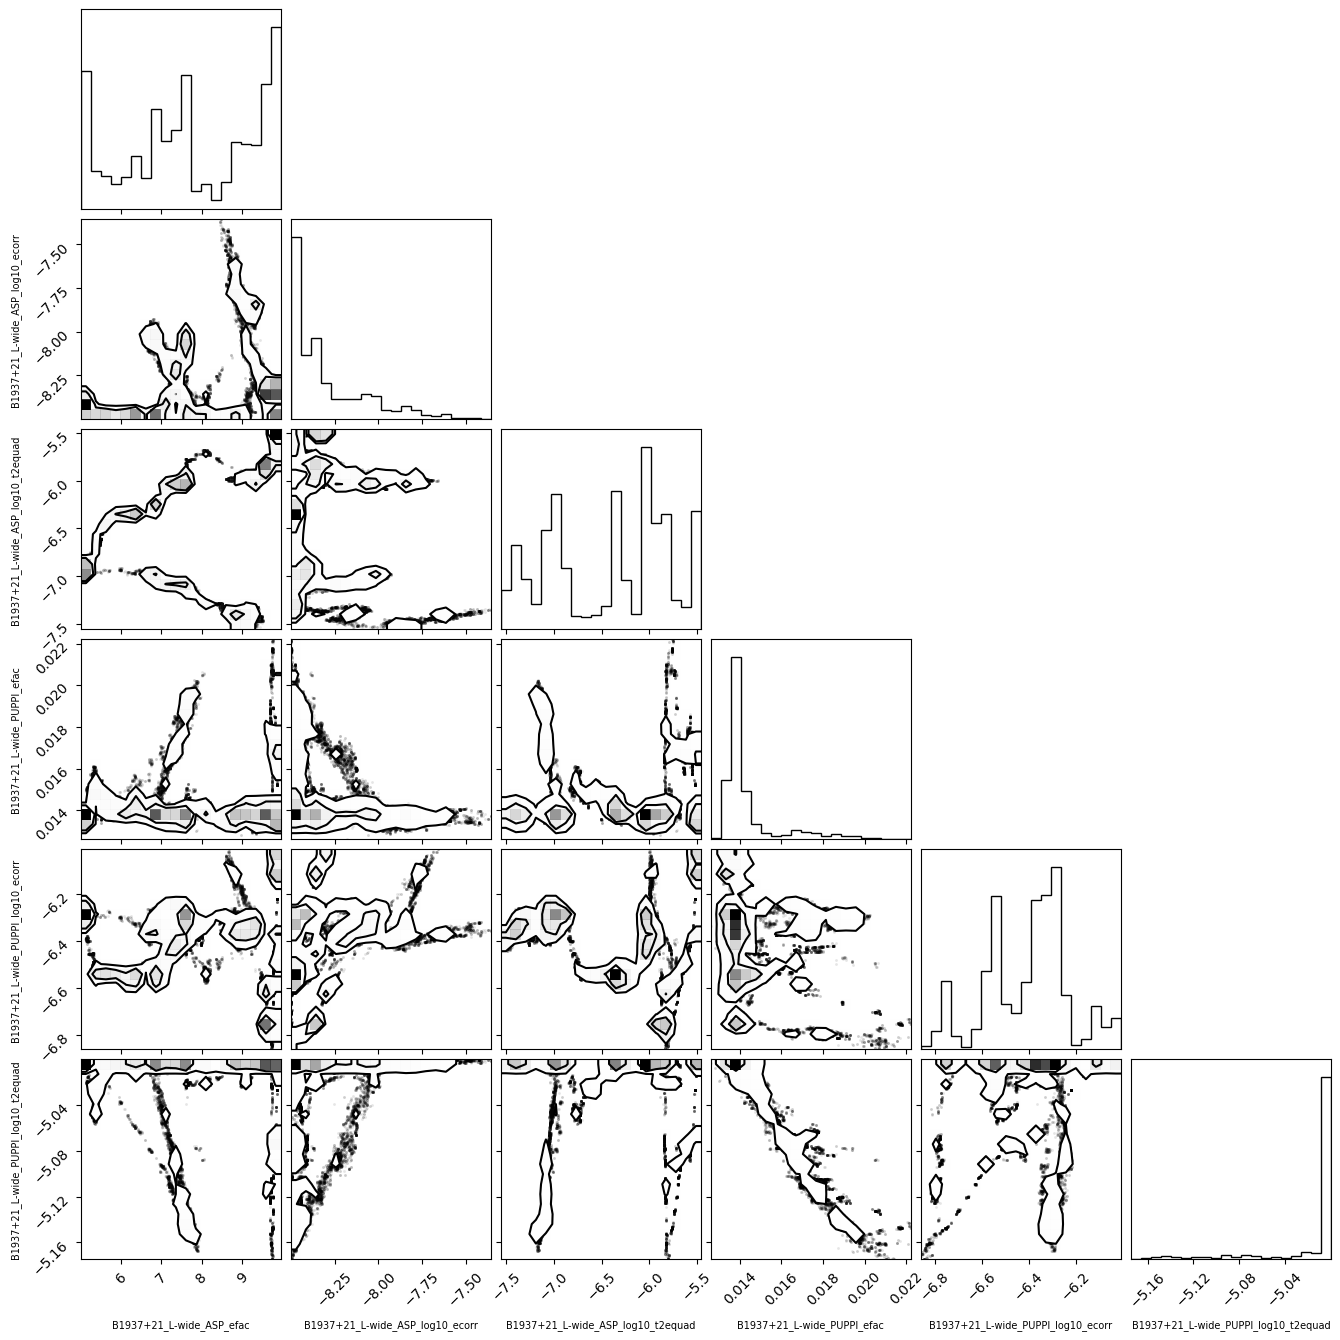

In [6]:
# Make 2d histogram plot for white noise
ind_end = list(param_names).index('B1937+21_Rcvr1_2_GASP_efac')
print(ind_end)
fig = corner.corner(chain[burn:, np.arange(ind_end)],
                    labels=list(param_names[0:ind_end]),
                    label_kwargs={"fontsize": 7},
                    levels=[0.68,0.95]);

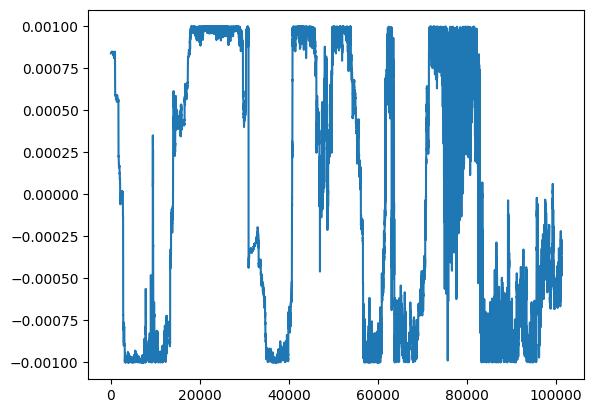

In [7]:
# Make trace-plot to diagnose sampling
plt.plot(chain[burn:, ind_k])

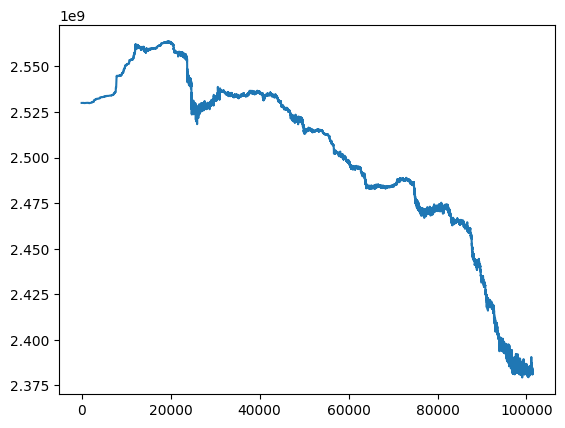

In [8]:
plt.plot(chain[burn:, ind_P])

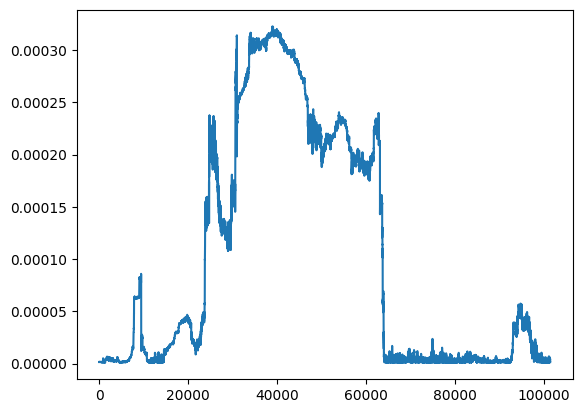

In [9]:
plt.plot(chain[burn:, ind_a1])

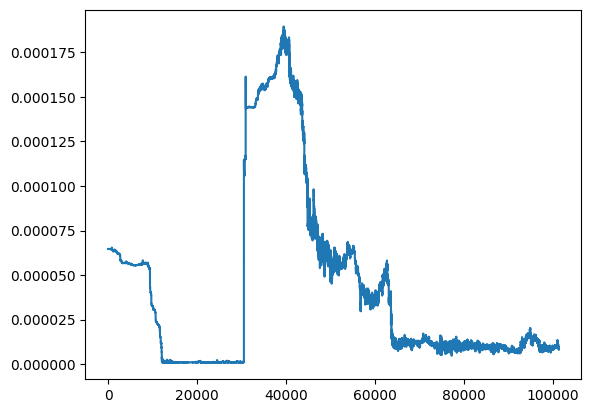

In [10]:
plt.plot(chain[burn:, ind_a2])

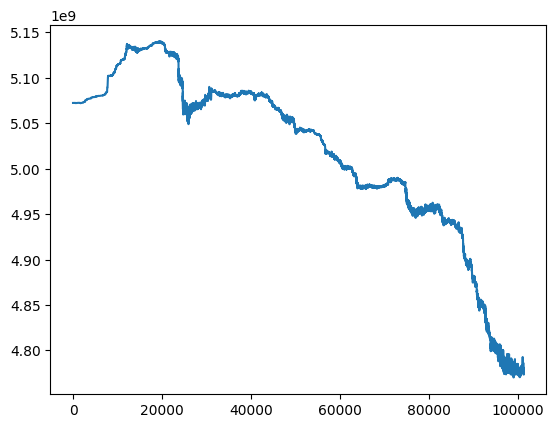

In [11]:
plt.plot(chain[burn:, ind_t0])

Text(0, 0.5, 'PDF')

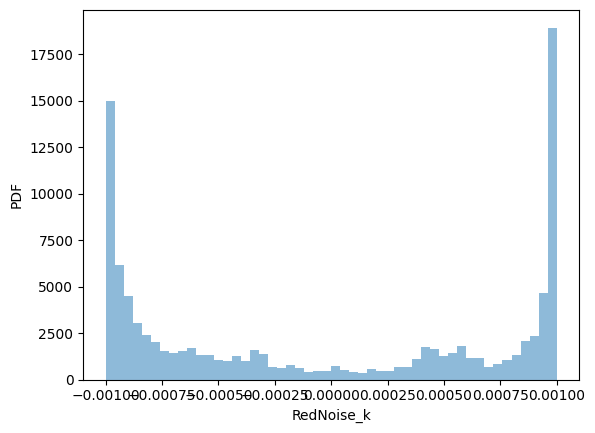

In [12]:
# Plot a histogram of the marginalized posterior distribution
plt.hist(chain[burn:,ind_k], 50, histtype='stepfilled', 
         lw=2, color='C0', alpha=0.5)
plt.xlabel('RedNoise_k')
plt.ylabel('PDF')

Text(0, 0.5, 'PDF')

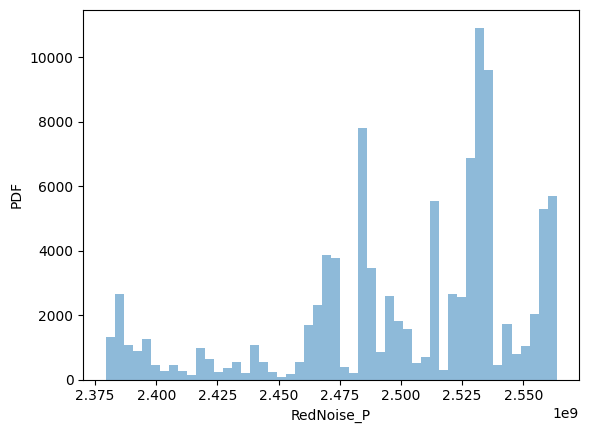

In [13]:
plt.hist(chain[burn:,ind_P], 50, histtype='stepfilled', 
         lw=2, color='C0', alpha=0.5)
plt.xlabel('RedNoise_P')
plt.ylabel('PDF')

In [14]:
import astropy.units as unit

In [15]:
print(5.4e8 * unit.s.to(unit.day))

6250.0


Text(0, 0.5, 'PDF')

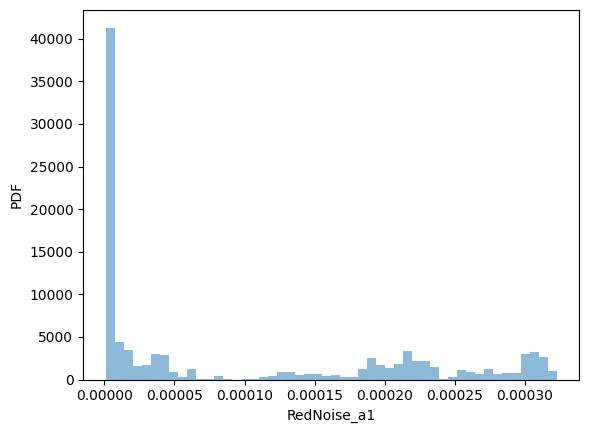

In [16]:
plt.hist(chain[burn:,ind_a1], 50, histtype='stepfilled', 
         lw=2, color='C0', alpha=0.5)
plt.xlabel('RedNoise_a1')
plt.ylabel('PDF')

Text(0, 0.5, 'PDF')

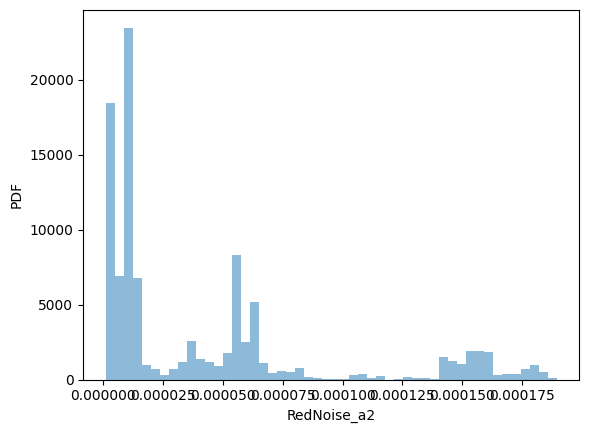

In [17]:
plt.hist(chain[burn:,ind_a2], 50, histtype='stepfilled', 
         lw=2, color='C0', alpha=0.5)
plt.xlabel('RedNoise_a2')
plt.ylabel('PDF')

Text(0, 0.5, 'PDF')

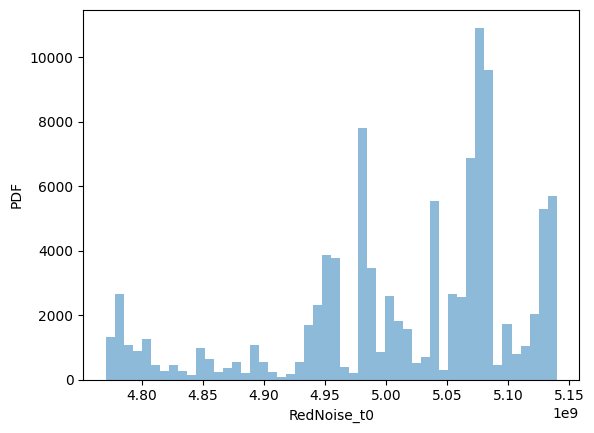

In [18]:
plt.hist(chain[burn:,ind_t0], 50, histtype='stepfilled', 
         lw=2, color='C0', alpha=0.5)
plt.xlabel('RedNoise_t0')
plt.ylabel('PDF')